# <div align='center'>第1章 数据描述性分析</div>
### 内容
 <div align='left'>                  
     <font color='steelblue' size=4>
       1.1 描述统计量<br>
       1.2 数据的分布<br>
       1.3 概率分布函数的图形<br>
       1.4 直方图、经验分布与QQ图<br>
       1.5 多元数据的数据特征与相关性分析<br>
       1.6 多元数据的基本图形表示<br>
         </font>
       </div>

数据的统计分析分为统计描述和统计推断两部分。前者通过绘制统计图、编制统计表、计算统计量等方法表述数据的分布特征，是数据分析的基本步骤，也是统计推断的基础。其优点在于方便、直观，利于对数据特征的理解。

-------------------

## 1.1  描述统计量
   数据是信息的载体，从数据到信息，需要先分析数据的主要特征，这些特征包括数据的位置度量、分散程度度量、关系度量以及分布形状的度量

### 1.1.1 位置与分散程度的度量

import scipy.stats as st
https://docs.scipy.org/doc/scipy/reference/stats.mstats.html

print(x.min())   # equivalent to np.min(x)
-3.78975572422  # random

print(x.max())   # equivalent to np.max(x)
5.26327732981  # random

print(x.mean())  # equivalent to np.mean(x)
0.0140610663985  # random

print(x.var())   # equivalent to np.var(x))
1.28899386208  # random

原始数据：
 [17.7 20.8 14.9 30.2  8.8 15.3 13.1  6.   8.9 10.9 13.8 30.2 16.  18.5
  7.1 17.8 24.1 19.6 29.1 11.4 24.  27.4 10.6  5.8 13.7  6.5 30.8 20.9
 16.4  3.9  9.5 14.7 10.6  7.4  6.4 12.3 15.2 11.3  8.9 22.3  6.5 33.7
 10.3 17.9  3.7  5.2 21.6 15.1 12.3 11.   7.8 12.2  4.7  6.7 10.2 10.6
 26.5 22.6 18.5 22.5  4.1 12.8 15.6 13.6 11.4  9.9 10.1 10.9  7.2  5.1
 10.6 39.3 16.2 13.6 27.6 19.2 11.9  9.3  9.5 14.1 20.7 12.3  6.   9.7
 13.9 23.  24.5 22.9  7.9 17.3 12.4 35.4  8.1 13.1 20.9 25.  16.7  7.2
 10.8  9.  21.8 24.9 36.9 31.9 15.8 12.3 13.5 27.4 10.6 19.1 18.6  5.6
 17.9 10.6 32.8 23.2 23.5 14.1]
重复值：
 RepeatedResults(values=array([ 6. ,  6.5,  7.2,  8.9,  9.5, 10.6, 10.9, 11.4, 12.3, 13.1, 13.6,
       14.1, 17.9, 18.5, 20.9, 27.4, 30.2]), counts=array([2, 2, 2, 2, 2, 6, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))
均值：
 15.607627118644066 15.607627118644066
几何平均： 13.649597971030223
调和平均： 11.80168305959727
中位数：
 13.649999999999999
众数：
 10.6
15-30范围内的均值：
 20.734883720930235
数据排序的结

C:\Users\xyt55\AppData\Local\Temp\ipykernel_10612\775750999.py:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('众数：\n',st.mode(weights)[0][0])
C:\Users\xyt55\AppData\Local\Temp\ipykernel_10612\775750999.py:83: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights,kde = Fa

<AxesSubplot: ylabel='Density'>

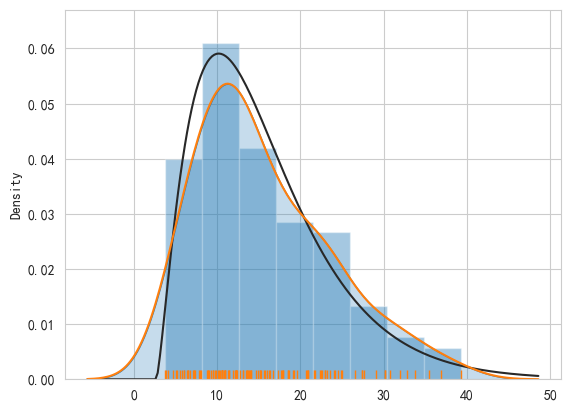

In [1]:
import numpy as np
import scipy.stats as st
from scipy.stats.mstats import mquantiles, scoreatpercentile
from scipy import stats,integrate
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

'''
例子
'''
# weights =np.array([75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7, 
                    # 63.5,66.6, 64.0, 57.0, 69.0, 56.9, 50.0, 72.])

# 利用pandas读取Excel    
df = pd.read_excel(r'.\data.xlsx',sheet_name= 'Sheet1', header= 0)
# print(df)
weights = np.array(df['Zn']) # 转为矩阵形式
print('原始数据：\n',weights)
print('重复值：\n',st.find_repeats(weights))
#均值（两种方法）
w_mean = np.mean(weights)
w_mean1 = weights.mean()
print('均值：\n',w_mean,w_mean1)

print('几何平均：',st.gmean(weights))
print('调和平均：',st.hmean(weights))
print('中位数：\n',np.median(weights)) # 中位数
# 众数
# counts = np.bincount(weights)
#返回众数
# print('众数：\n',np.argmax(counts)) # 众数此种方法进适用于非负整数
print('众数：\n',st.mode(weights)[0][0])

#限定范围内的数据求均值
limitedMean = st.tmean(weights,(15,30))
print('15-30范围内的均值：\n',limitedMean)
#后面例子简单一带而过吧
sorted_weig = sorted(weights,reverse=False) # 排序，reverse的缺省值为False（升序）
print('数据排序的结果(从小到大)：\n',sorted_weig)
median_weig = np.median(weights)
print(median_weig)
# 计算分位数
quantiles = np.quantile(weights,[0.1,0.2,0.4,0.6,0.8,1])
print('Zn的[10%,20%,40%,60%,80%,100%]分位数：',quantiles)
print(mquantiles(weights)) # Computes empirical quantiles for a data array.
print(scoreatpercentile(weights, 50)) # Calculate the score at the given ‘per’ percentile of the sequence a. For example, the score at per=50 is the median.
'''
方差、标准差、极差与标准误
'''
#注意方差与方差的无偏估计之间的计算区别
v = np.var(weights)#有偏估计或样本方差
v_unb = st.tvar(weights)#无偏估计
print('Zn数据方差的估计为：%0.2f,无偏估计为：%0.2f'%(v,v_unb))

#注意标准差与标准差的无偏估计之间的计算区别
s = np.std(weights)#有偏估计或样本标准差
s_unb = st.tstd(weights)#无偏估计
print('Zn数据标准差的估计为：%0.2f,无偏估计为：%0.2f'%(s,s_unb))
print('方差:\n',weights.var())
cv = s_unb/w_mean*100#变异系数，无量纲，用百分数表示
print('Zn数据的变异系数为：',np.round(cv,2),'%')

#极差与标准误
R_weights = np.max(weights) - np.min(weights)#极差：最大值-最小值
print('Zn数据的极差：%0.2f'%R_weights)
sm_weights = st.tstd(weights)/np.sqrt(len(weights))#标准误：数据标准差（无偏）/数据量**0.5
print('Zn数据的标准误：%0.2f'%sm_weights)

# sns.distplot(weights,kde = False)
# 指定bins（ 代表将当前的坐标轴等分的切分成多少小块）的宽度，更详细的查看该特征的变换情况
#  kde = False，关闭核密度分布，
# 核密度：对数据分布不附加任何假定，是一种从数据样本本身出发研究数据分布特征的方法
# rug = True, 在x轴上每个观测上生成的小细条（边际毛毯）： 表示数据的分布

# sns.distplot(weights,bins = 20,kde = False,rug = True)
# fit 拟合参数分布，利用distplot() 把数据拟合成参数分布的图形，
#并且观察他们之间的差距，在运用fit来进行参数控制
# fit 拟合   可以传进来，当前统计的指标
sns.distplot(weights,kde = False,fit = stats.gamma)
# 关闭直方图，开启rug 细条
sns.distplot(weights,hist = False,rug = True)

# kdeplot() 函数：shade 控制阴影,默认开启rug,细条
sns.kdeplot(weights,shade = True)

区间统计

In [63]:
def interval_statistics(data, intervals):
    if len(data) == 0:
        return
    for num in data:
        for interval in intervals:
            lr = tuple(interval.split('~'))
            left, right = float(lr[0]), float(lr[1])
            if left <= num <= right:
                intervals[interval] += 1
                break
    for key, value in intervals.items():
        print("%10s" % key, end='')  # 借助 end=''可以不换行
        print("%10s" % value, end='')  # "%10s" 右对齐
        print('%16s' % '{:.3%}'.format(value * 1.0 / len(data)))

start = 3  # 区间左端点
number_of_interval = 20  # 区间个数
length = 2  # 区间长度
intervals = {'{:.3f}~{:.3f}'.format(length*x+start, length*(x+1)+start): 0 for x in range(number_of_interval)}  # 生成区间
# print(intervals)
data = weights
# print(data)
interval_statistics(data, intervals)


3.000~5.000         4          3.390%
5.000~7.000        10          8.475%
7.000~9.000        11          9.322%
9.000~11.000        18         15.254%
11.000~13.000        11          9.322%
13.000~15.000        12         10.169%
15.000~17.000         9          7.627%
17.000~19.000         8          6.780%
19.000~21.000         7          5.932%
21.000~23.000         7          5.932%
23.000~25.000         7          5.932%
25.000~27.000         1          0.847%
27.000~29.000         3          2.542%
29.000~31.000         4          3.390%
31.000~33.000         2          1.695%
33.000~35.000         1          0.847%
35.000~37.000         2          1.695%
37.000~39.000         0          0.000%
39.000~41.000         1          0.847%
41.000~43.000         0          0.000%


统计信息：
               编号       SiO2        CaO        MgO      Al2O3        K2O  \
count  26.000000  26.000000  26.000000  26.000000  26.000000  26.000000   
mean   12.500000  71.198846   1.331154   0.921923  12.253077   4.365769   
std     7.648529   5.023318   0.753176   0.411320   2.616396   0.771389   
min     0.000000  61.980000   0.200000   0.140000   6.630000   3.080000   
25%     6.250000  67.560000   0.725000   0.702500  10.630000   3.797500   
50%    12.500000  70.970000   1.335000   0.885000  13.360000   4.225000   
75%    18.750000  73.537500   1.877500   1.102500  14.250000   5.107500   
max    25.000000  82.790000   3.190000   1.950000  15.500000   5.600000   

            Na2O         Cu         Mo         Ag  
count  26.000000  26.000000  26.000000  26.000000  
mean    1.918077   0.092692   0.055731   1.491154  
std     1.539153   0.084122   0.073636   1.225138  
min     0.080000   0.000000   0.000000   0.000000  
25%     0.370000   0.020000   0.005000   0.287500  
50%  

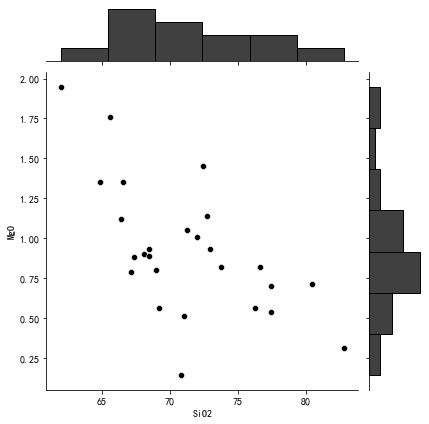

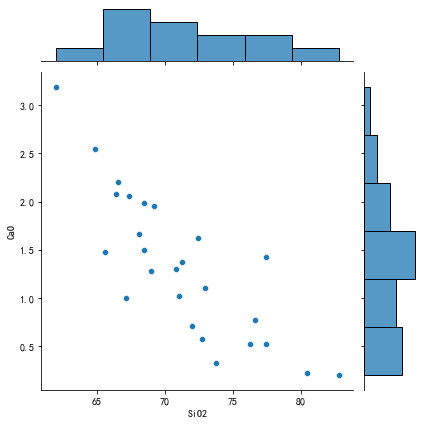

In [65]:
# 读取多类别数据分析
# 利用pandas读取Excel    
df = pd.read_excel(r'.\data.xlsx',sheet_name= 'Sheet2', header= 0)
# print(df)
print('统计信息：\n',df.describe())
fields = df.columns.values
sns.jointplot(x = df['SiO2'],y = df['MgO'],kind = "scatter",color = 'k')


print(fields)
print(fields[2])
df_list = df.values
data =np.matrix(df_list)
print(data)
# 散点图显示二维数据
print(data[:,2:4])
df1 = pd.DataFrame(data[:,2:4],columns = ['SiO2','CaO'])
sns.jointplot(x = 'SiO2',y = 'CaO',data = df1)
# sns.lmplot(x='SiO2',y='CaO',data=df1)
# sns.regplot(x = 'SiO2',y = 'CaO',data=  df1)

# 用with打开画图的风格“white”: 黑白相间的,Hex 图
# with sns.axes_style("white"):
#     sns.jointplot(x = 'SiO2',y = 'CaO',kind = "hex",color = 'k')
    

print(data.shape)
k = data.shape[1]-2
print(k)
print(data[:,2:].mean())
for i in range(k):
    # print(i)
    # print(data[:,i+2])
    x=np.array(data[:,i+2]) # 转成一维数组处理
    mean_data = np.mean(x)
    print(fields[i+2],'\n平均值：',mean_data)
    #极差与标准误
    R_weights = np.max(x) - np.min(x)#极差：最大值-最小值
    print('极差：%0.2f'%R_weights)
    # 计算分位数
    quantiles = np.quantile(x,[0.1,0.2,0.4,0.6,0.8,1])
    print('[10%,20%,40%,60%,80%,100%]分位数：',quantiles)
    #注意标准差与标准差的无偏估计之间的计算区别
    s = np.std(weights)#有偏估计或样本标准差
    s_unb = st.tstd(weights)#无偏估计
    print('标准差的估计为：%0.2f,无偏估计为：%0.2f'%(s,s_unb))
    cv = s_unb/mean_data*100#变异系数，无量纲，用百分数表示
    print('Zn数据的变异系数为：',np.round(cv,2),'%')
    
                             
# data_1 = data[:,2:]
# print('---------------')
# data1_T = data_1.T
# print(data1_T)
# print('（前五个）：\n',data1_T)
# print('矩阵行数：\n',data1_T.shape[0])  # 矩阵行数
# print('矩阵列数：\n',data1_T.shape[1])  # 矩阵列数
# for i in range(0,data1_T.shape[0]):
#     mean_data = np.mean(data1_T[i,:])
    # print(mean_data)
# stu_mean = np.round(data_1.T.mean(0),1).ravel()#将二维矩阵展平为一维向量,数据类型转变为Numpy数组
# print('\n学生的平均身高、平均体重、平均胸围和平均坐高分别为：\n %.1f, %.1f, %.1f, %.1f,' 
#       %(stu_mean[0],stu_mean[1],stu_mean[2],stu_mean[3]))

 ### orn绘图展示数据
 https://seaborn.pydata.org/index.html

In [51]:
import numpy as np
import scipy.stats as st
from scipy.stats.mstats import mquantiles, scoreatpercentile
from scipy import stats,integrate
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
df = pd.read_excel(r'.\data.xlsx',sheet_name= 'Sheet2', header= 0)
df.head(5)
# , index_col='编号'

,编号,类别,SiO2,CaO,MgO,Al2O3,K2O,Na2O,Cu,Mo,Ag
0,0,1,73.74,0.33,0.82,10.75,5.20,0.58,0.11,0.077,1.40
1,1,1,72.73,0.58,1.14,11.97,5.48,0.89,0.21,0.070,1.53
2,2,1,72.44,1.62,1.45,10.88,4.80,0.14,0.05,0.227,0.20
3,3,1,71.28,1.37,1.05,11.50,4.83,0.36,0.17,0.222,2.70
4,4,1,77.42,0.52,0.54,8.63,4.36,0.40,0.08,0.043,1.80


In [49]:
fields = df.columns.values
print(fields)

['编号' '类别' 'SiO2' 'CaO' 'MgO' 'Al2O3' 'K2O' 'Na2O' 'Cu' 'Mo' 'Ag']


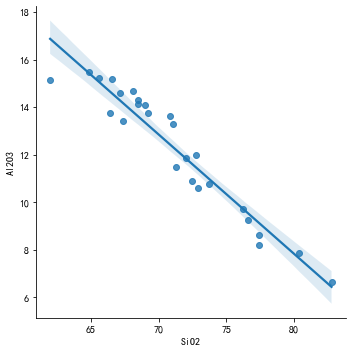

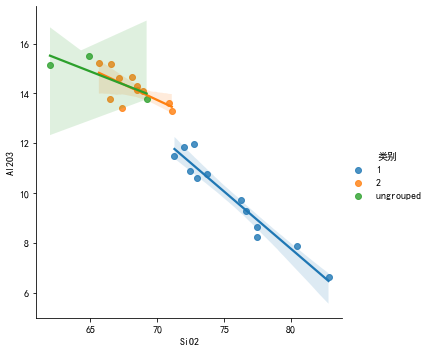

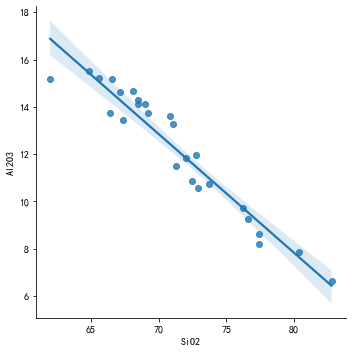

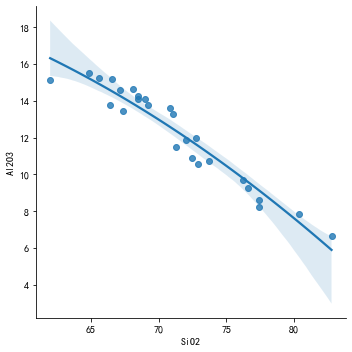

In [53]:
sns.lmplot(x='SiO2',y='Al2O3',data=df)
sns.lmplot(x='SiO2',y='Al2O3',data=df,hue='类别')
sns.lmplot(x='SiO2',y='Al2O3',data=df,ci=95)
sns.lmplot(x='SiO2',y='Al2O3',data=df,order=2)  #一元线性回归

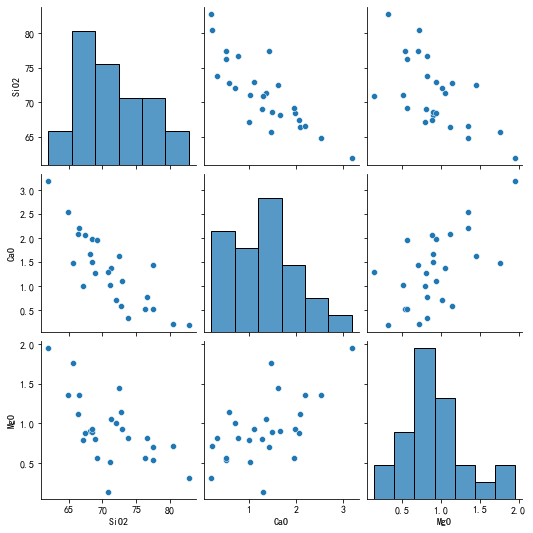

In [55]:
sns.pairplot(df.iloc[:,2:5])

<AxesSubplot:xlabel='类别', ylabel='MgO'>

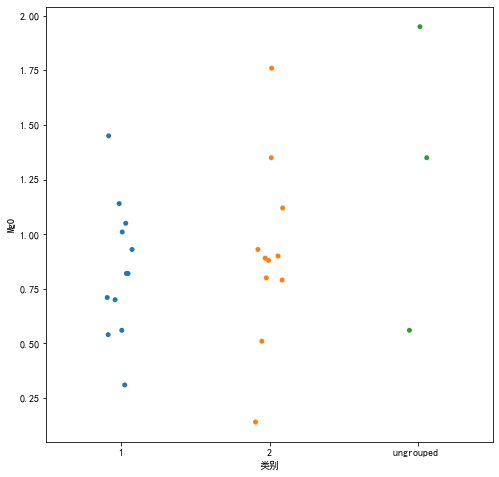

In [56]:
# sns.stripplot(x=fields[1],y=fields[4], data= df, jitter= True)
# 利用hue参数进行内部的分类
sns.stripplot(x='类别',y='MgO', data= df, jitter= True)

<AxesSubplot:xlabel='类别', ylabel='MgO'>

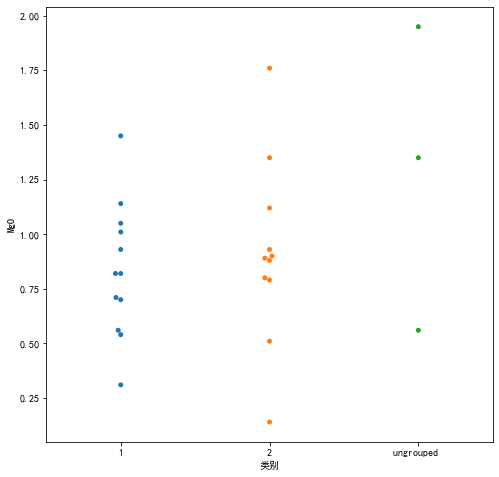

In [57]:
sns.swarmplot(x='类别',y='MgO', data= df)

<AxesSubplot:>

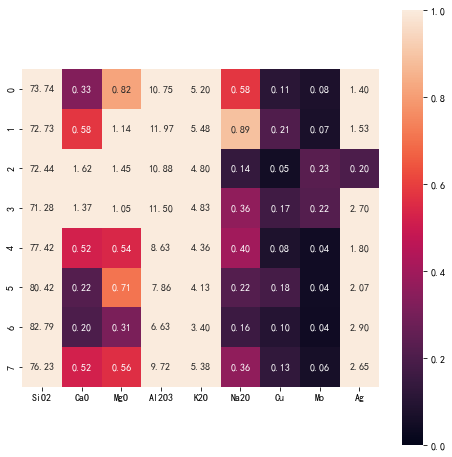

In [58]:
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data=df.iloc[0:8,2:11],square=True,vmin=0,vmax=1,annot=True,fmt='.2f')

<AxesSubplot:xlabel='类别', ylabel='CaO'>

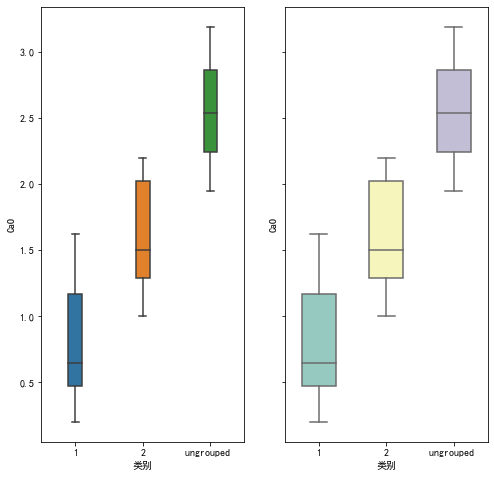

In [59]:
fig,axes=plt.subplots(1,2,sharey=True)
sns.boxplot(x=fields[1],y=fields[3],data=df,ax=axes[0],width= 0.2) #左图
sns.boxplot(x=fields[1],y=fields[3],data=df,palette="Set3",ax=axes[1],width=0.5) #右图


<AxesSubplot:xlabel='类别', ylabel='CaO'>

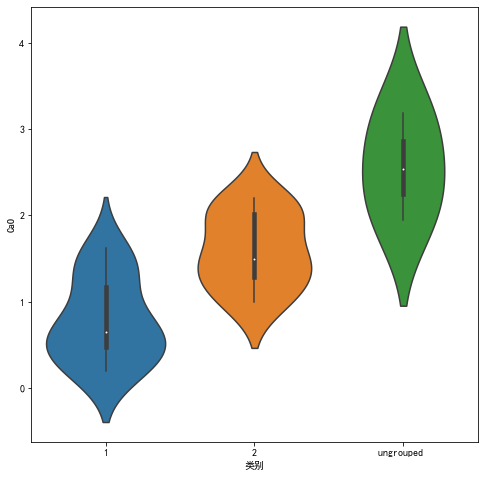

In [60]:
sns.violinplot(x=fields[1],y=fields[3],data=df)

<AxesSubplot:xlabel='SiO2', ylabel='CaO'>

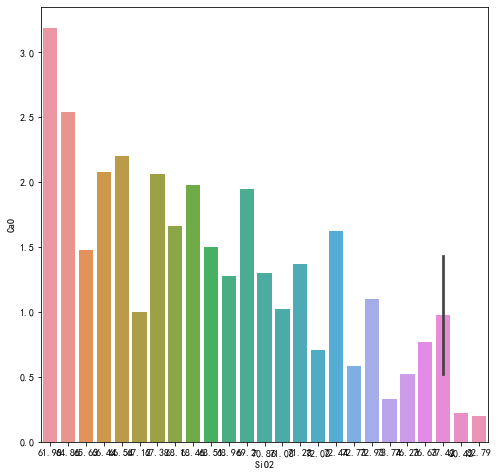

In [61]:
sns.barplot(x=fields[2],y=fields[3],data=df) #,hue=fields[1]

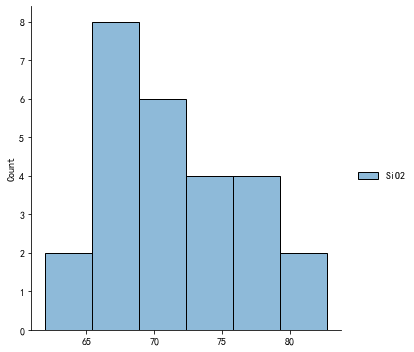

In [62]:
sns.displot(data=df.iloc[:,2:3])

### 1.1.2 关系度量

### 1.1.3 分布形状的度量


[[73.74 72.73 72.44 71.28 77.42 80.42 82.79 76.23 77.42 76.63 72.93 72.02
  68.1 70.86 68.51 66.44 68.96 67.12 71.08 68.46 67.38 66.54 65.63 64.86
  69.2 61.98]
 [0.33 0.58 1.62 1.37 0.52 0.22 0.2 0.52 1.43 0.77 1.1 0.71 1.66 1.3 1.5
  2.08 1.28 1.0 1.02 1.98 2.06 2.2 1.48 2.54 1.95 3.19]
 [0.82 1.14 1.45 1.05 0.54 0.71 0.31 0.56 0.7 0.82 0.93 1.01 0.9 0.14
  0.89 1.12 0.8 0.79 0.51 0.93 0.88 1.35 1.76 1.35 0.56 1.95]
 [10.75 11.97 10.88 11.5 8.63 7.86 6.63 9.72 8.22 9.26 10.59 11.85 14.66
  13.61 14.29 13.76 14.11 14.61 13.29 14.13 13.43 15.19 15.22 15.5 13.76
  15.16]
 [5.2 5.48 4.8 4.83 4.36 4.13 3.4 5.38 4.5 4.43 5.38 5.38 4.1 5.6 4.26
  4.04 4.19 4.13 5.35 3.94 3.75 3.48 3.63 3.19 3.5 3.08]
 [0.58 0.89 0.14 0.36 0.4 0.22 0.16 0.36 0.08 0.53 0.3 1.25 4.01 2.32
  3.16 2.05 2.86 2.71 1.57 3.74 4.01 3.86 4.01 4.04 2.54 3.72]
 [0.11 0.21 0.05 0.17 0.08 0.18 0.1 0.13 0.11 0.13 0.25 0.33 0.06 0.02
  0.09 0.09 0.14 0.05 0.02 0.01 0.01 0.01 0.06 0.0 0.0 0.0]
 [0.077 0.07 0.227 0.222 0.043 

<AxesSubplot:>

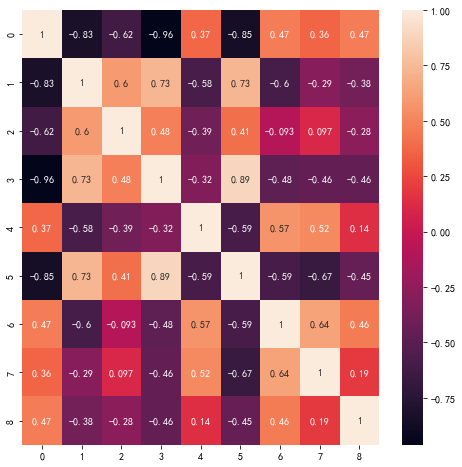

In [68]:
'''
求向量之间的方差-协方差矩阵时，需要对矩阵进行转置，将列向量转换成行向量。
求相关系数矩阵时同样也要进行转置，相关系数矩阵是协方差矩阵进行标准化转换之后的结果。
'''
data_test = np.array(data[:,2:]).T
print(data_test)
###协方差矩阵：covariance
cov_stu = np.cov(data_test.astype(float))#方差-协方差矩阵
### 相关系数矩阵：correlation coefficient
rou_stu = np.corrcoef(data_test.astype(float))

#四个随机向量之间的相关程度很高，尤其是身高与坐高之间的相关性最高（0.92）。
print('变量之间的协方差与相关系数矩阵分别如下：\n\n',np.round(cov_stu,2),
      '\n\n',np.round(rou_stu,2))

sns.heatmap(rou_stu,annot=True)


<AxesSubplot:>

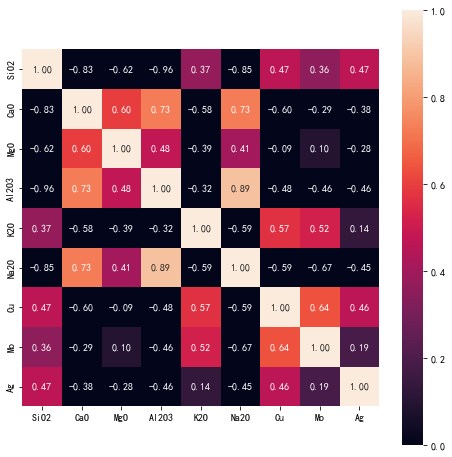

In [69]:
df = pd.DataFrame(rou_stu,columns=fields[2:],index= fields[2:])
sns.heatmap(data=df.iloc[:,:],square=True,vmin=0,vmax=1,annot=True,fmt='.2f')

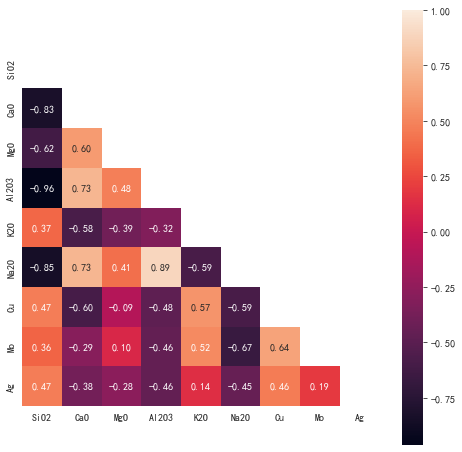

In [70]:
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask, vmax=1, square=True,annot=True,fmt='.2f')
figure = ax.get_figure()


In [71]:
'''
偏度计算：
（1）偏度表示曲线是向左偏或右偏，又称为副偏态或正偏态。
（2）偏度越接近0，越符合正态分布的曲线。
（3）偏度小于0称分布具有负偏离，也称左偏态；反之就是正偏态或右偏态。

'''
# print(data)
weights = np.array(data[:,2:3]).ravel() #SIO2 将数组维度拉成一维数组
print(weights)
###偏度计算公式
n = len(weights)
w_mean = weights.mean()
s = np.std(weights)#有偏估计或样本标准差
s_unb =  st.tstd(weights)#无偏估计
#三阶矩，其他各阶矩的计算依次类推
u3 = np.sum((weights-w_mean)**3)/n

###使用使用总体标准差的无偏估计，计算的偏度是修正后偏度
skew1 = ((n**2)*u3)/((n-1)*(n-2)*(s_unb**3))

###pandas计算是修正后偏度
pd_weights = pd.Series(weights)
skew_pandas = pd_weights.skew()
print('Pandas计算公式手工计算以及调用函数计算结果：')
print('skew1:',skew1,'skew_pandas:',skew_pandas)


###无修正偏度的手工计算，使用样本标准差
skew2 = np.sum((weights-w_mean)**3)/((s**3)*n)

###scipy计算公式和结果
print('\nScipy计算公式手工计算以及调用函数计算结果（无修正）：')
skew_scipy = st.skew(weights)
print('skew2:',skew2,'skew_scipy:',skew_scipy)

'''
(1)使用Scipy的skew函数，如果将第二个参数bias设为False，计算结果就和Pandas完全相同了。
   bias参数表示是否修正，如果为False表示修正，反之则不修正。
(2)总体上感觉修正后偏度比较准确，但是很多场合仍用无修正的偏度进行统计量的计算。
(3)StatsModels的线性回归模型对残差的正态分布性（Jarque-Bera、Omnibus检验等）
   进行检验时，使用的偏度就是无修正的，包括峰度也是无修正的。
'''
skew_scipy_bias = st.skew(weights,bias=False)
print('\nScipy进行修正后的偏度：',skew_scipy_bias)

[73.74 72.73 72.44 71.28 77.42 80.42 82.79 76.23 77.42 76.63 72.93 72.02
 68.1 70.86 68.51 66.44 68.96 67.12 71.08 68.46 67.38 66.54 65.63 64.86
 69.2 61.98]
Pandas计算公式手工计算以及调用函数计算结果：
skew1: 0.5147886635734343 skew_pandas: 0.5147886635734346

Scipy计算公式手工计算以及调用函数计算结果（无修正）：
skew2: 0.48460014294226933 skew_scipy: 0.4846001429422694

Scipy进行修正后的偏度： 0.5147886635734342


In [72]:
'''
峰度的计算：
（1）峰度表示曲线是扁平态（低峰态）还是尖峰态。
（2）正常值有两种定义：Fisher定义该值为0；Pearson定义为3。
（3）按照Fisher定义，峰度=0表示正好符合正态分布的曲线；大于0表示峰比较尖，反之表示比较平。
'''
###峰度计算，StatsModels多使用无修正的峰度
#手工实现留作练习
kurt_pandas = pd_weights.kurt()
kurt_scipy = st.kurtosis(weights,bias=False)
kurt_scipy_bias = st.kurtosis(weights,bias=True)#True是bias的缺省值
print('\nPandas计算峰度:',kurt_pandas,'\n\nScipy计算峰度（修正后）:',
      kurt_scipy,'\n\nScipy计算峰度（无修正）:',kurt_scipy_bias)


Pandas计算峰度: -0.09236489955342764 

Scipy计算峰度（修正后）: -0.09236489955342897 

Scipy计算峰度（无修正）: -0.2977561845236929


### 1.1.4 数据特性的总括

In [73]:

print('数据的总括描述：',st.describe(weights,bias=False))


print('\n数据的正态性检验：',st.shapiro(weights))
print('\n测试不服从正态分布的数据：',st.shapiro([1,2,3,4,900]))#p值远小于0.05，拒绝原假设


#生成服从f分布，自由度为(2,9)的随机数据
f_data = st.f.rvs(size = 50,dfn=2,dfd=9)
#检验上述数据是否服从自由度为3的t分布，结果很显然拒绝服从该分布的原假设。
print('\n检验数据是否服从某种分布：',st.kstest(f_data,'t',(3,)))#(3,)表示t分布的自由度
print('\n检验数据是否服从某种分布：',st.kstest(f_data,'f',(2,9)))#接受原假设服从自由度为2,9的f分布

数据的总括描述： DescribeResult(nobs=26, minmax=(61.98, 82.79), mean=71.19884615384616, variance=25.233722615384632, skewness=0.5147886635734342, kurtosis=-0.09236489955342897)

数据的正态性检验： ShapiroResult(statistic=0.9708032011985779, pvalue=0.644248902797699)

测试不服从正态分布的数据： ShapiroResult(statistic=0.5549201965332031, pvalue=0.0001440312626073137)

检验数据是否服从某种分布： KstestResult(statistic=0.5147524252028689, pvalue=7.880413383067448e-13)

检验数据是否服从某种分布： KstestResult(statistic=0.10474500364981537, pvalue=0.6055970865499143)


-------------------

## 1.2  数据的分布


### 1.2.2 常见离散型分布



- #### 示例：
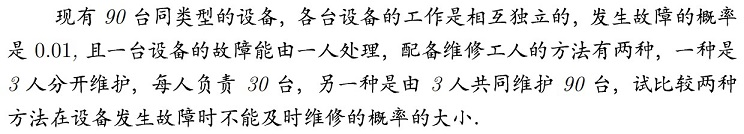

In [ ]:

#3人分别负责30台发生故障不能修理的概率
p30=st.binom.sf(k=1,p=0.01,n=30)*3
#3人共同负责90台发生故障不能修理的概率
p90=st.binom.sf(k=3,p=0.01,n=90)
print('p30 =',p30,'，p90 =',p90)
print('3人共同维护90台机器时,发生故障不能及时修理的概率更小。')

In [ ]:

###下面两种计算方式的效果相同,pmf函数计算离散型随机变量的概率质量函数。
p30_1=(1-(st.binom.pmf(k=0,p=0.01,n=30)+st.binom.pmf(k=1,p=0.01,n=30)))*3
#cdf计算累积分布函数的值
p30_2=(1-st.binom.cdf(k=1,p=0.01,n=30))*3
p30_1,p30_2

- #### Poisson（泊松）分布

- #### 示例：
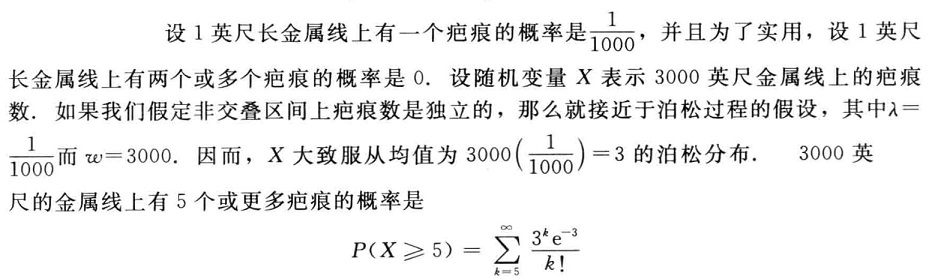

In [ ]:

###通过累积分布函数间接求解

#mu表示均值，本例中等于3，下同。
p4=st.poisson.cdf(k=4,mu=3)
p5=1-p4
print('3000英尺的金属线上有5个及以上疤痕的概率是(通过累积分布函数)：',np.round(p5,3))

###通过生存函数直接求解
#注意这里的k不是5而是4。
p5_1=st.poisson.sf(k=4,mu=3)
print('\n3000英尺的金属线上有5个及以上疤痕的概率是(通过生存函数)：',np.round(p5_1,3))

### 1.2.3 常见连续型分布 

- #### 正态分布



In [ ]:
import scipy.integrate as integ

#构建服从正态分布的概率密度函数的值，均值mu为1，标准差sigma为0.5
x = np.arange(-2,4,0.01)
#根据x计算正态分布的概率密度函数
n_density = (1/(((2*np.pi)**0.5)*0.5))*np.exp((-(x-1)**2)/(2*(0.5**2)))#第1个公式f(x)
#正态分布的密度函数曲线，后面还有更具体的图形例子
print('正态分布概率密度函数曲线(均值:1，标准差:0.5)：')
plt.plot(x,n_density)
plt.show()

#累积分布函数的计算,设x0=1.5，则F(x0)=P(x<1.5)
#即求概率密度函数f(x)在(-Inf,1.5]区间的积分
def nf(x,mu,sigma):
    return (1/(((2*np.pi)**(0.5))*sigma))*np.exp((-(x-mu)**2)/(2*(sigma**2)))

#累积分布函数是对概率密度函数求积分（针对连续型随机变量，离散型随机变量是求和）
n_distrib = integ.quad(nf,float('-Inf'),1.5,args=(1,0.5))[0]#第二个公式F(x)的实现
print('\n手工计算分布函数的值：', n_distrib)


#直接调用Scipy的累积分布函数
n_distrib_scipy = st.norm.cdf(1.5,1,0.5)
print('\nScipy函数计算正态分布的累积分布函数的值：', n_distrib_scipy)

#Scipy有关概率分布的其他应用
print('\n服从正态分布的随机数生成：',st.norm.rvs(1,0.5,5))


print('\n概率密度函数(显示前10个)：',st.norm.pdf(x,0.5,1)[0:10])
print('\n生存函数：',st.norm.sf(1.5,1,0.5))# sf=1-cdf
print('\n分位数函数：',st.norm.ppf(0.84,1,0.5))#注意：通常都是通过下分位数（下尾）计算分位数。

#该分布下随机变量有95%的可能性位于该区间
print('\n置信度0.95的置信区间：',st.norm.interval(0.95,1,0.5))

- #### t分布


In [ ]:
import scipy.special as ss
#t分布的概率密度函数
def tf(x,d):
    return  ss.gamma((d+1)/2)*((1+(x**2)/d)**(-(d+1)/2))/((d*np.pi)**0.5*ss.gamma(d/2))
d=2
x = np.arange(-4,4,0.01)
t = ss.gamma((d+1)/2)*((1+(x**2)/d)**(-(d+1)/2))/((d*np.pi)**0.5*ss.gamma(d/2))
plt.figure(figsize=(8,6))
plt.plot(x,t)
plt.show()

#手工计算的概率密度函数和分布函数的值。
print('t分布概率密度函数的值(x0=2,df=2)：',tf(2,2))
#求概率密度函数的积分即可求出分布函数的值。
print('\nt分布在x0=1.5处的累积分布函数值：',integ.quad(tf,float('-Inf'),1.5,args=(2))[0])

#通过Scipy函数计算二者的值，其他函数的调用和前面正态分布类似，只不过t多了一个自由度参数。
print('\n使用Scipy计算概率密度函数值：',st.t.pdf(2,2))
print('\n使用Scipy计算累积分布函数值：',st.t.cdf(1.5,2))

- #### 伽马分布的计算


In [ ]:

x,a=3,2
gamma_pdf=x**(a-1)*np.exp(-3)/ss.gamma(2)
###比较手工计算与stats包gamma分布的pdf函数计算的值
#二者相等。后面一个值是调用pdf函数计算的
gamma_pdf,st.gamma.pdf(3,2)

In [ ]:
###a=3,b=4,x=0.1
0.1**2*0.9**3/ss.beta(3,4),st.beta.pdf(0.1,3,4)

- #### Scipy各种概率分布对应表：<br>
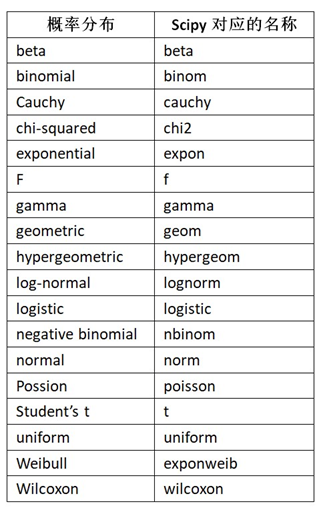

-------------------

## 1.3  概率分布函数的图形
常用分布函数在上表列出。<br>
此处以正态分布、F分布和卡方分布为例，使用python绘制各自的概率密度函数曲线。

### 1.3.1 正态分布的图形

In [ ]:
'''
正态分布的概率密度函数图形，根据不同的均值和标准差绘制曲线
'''

plt.figure(figsize=(8,6))
x = np.arange(-10.,10.,0.01)
y = st.norm.pdf(x,1.0,0.5)
plt.annotate("mu=1,sigma=0.5",xy=(1.0,st.norm.pdf(1.0,1.0,0.5)),
             xytext=(0.3,st.norm.pdf(1.0,1.0,0.5)+0.2),
             weight="bold",color='steelblue',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color="steelblue"))
y1 = st.norm.pdf(x,0.0,1.0)
plt.annotate("mu=0,sigma=1",xy=(0.0,st.norm.pdf(0.0,0.0,1.0)),
             xytext=(-3.8,st.norm.pdf(0.0,0.0,1.0)+0.2),
             weight="bold",color='darkorange',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))
y2 = st.norm.pdf(x,0.5,2.0)
plt.annotate("mu=0.5,sigma=2",xy=(3.0,st.norm.pdf(3.0,0.5,2.0)),
             xytext=(3.0,st.norm.pdf(3.0,0.5,2.0)+0.2),
             weight="bold",color='g',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))
y3 = st.norm.pdf(x,-0.5,3.0)
plt.annotate("mu=-0.5,sigma=3",xy=(-2.25,st.norm.pdf(-2.25,-0.5,3.0)),
             xytext=(-6,st.norm.pdf(-6,-0.5,3.0)+0.2),
             weight="bold",color='r',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("正态分布概率密度函数",size=14)
plt.xlabel("随机变量",size=14)
plt.ylabel("正态分布概率密度",size=14)
plt.ylim(-0.02,1.1)
plt.show()

### 1.3.2  $\chi^2$卡方分布的图形
卡方分布的概率密度函数在t分布中已经给出

In [ ]:
'''
卡方分布不同自由度的概率密度函数图形
'''
###生成模拟数据
x = np.arange(0.,14.,0.01)
#自由度(degree=1)的卡方分布随机数概率密度函数
y = st.chi2.pdf(x,1)
###annotate函数设置指向概率密度函数曲线的箭头和文字
plt.figure(figsize=(8,6))
plt.annotate("degree=1",xy=(3,st.chi2.pdf(3,1)),
             xytext=(0.7,st.chi2.pdf(3,1)-0.04),weight="bold",color='steelblue',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="steelblue"))

#生成另一个模拟数据，下面几行代码同样功能。
y1 = st.chi2.pdf(x,2)
plt.annotate("degree=2",xy=(1.8,st.chi2.pdf(1.8,2)),
             xytext=(1.8,st.chi2.pdf(1.8,2)+0.06),weight="bold",color='darkorange',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))
y2 = st.chi2.pdf(x,4)
plt.annotate("degree=4",xy=(3,st.chi2.pdf(3,4)),
             xytext=(3,st.chi2.pdf(3,4)+0.06),weight="bold",color='g',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))
y3 = st.chi2.pdf(x,6)
plt.annotate("degree=6",xy=(4.8,st.chi2.pdf(4.8,6)),
             xytext=(4.8,st.chi2.pdf(4.8,6)+0.06),weight="bold",color='r',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("卡方分布概率密度函数",size=14)
plt.xlabel("随机变量",size=14)
plt.ylabel("卡方分布概率密度",size=14)
plt.ylim(0.,0.4)
plt.show()

In [ ]:
###卡方分布的自由度极端高的曲线，这种情况极少见。
#当自由度趋近无穷时，卡方分布渐进服从正态分布，但是存在争议。
#见：https://www.zhihu.com/question/363857851
x = np.arange(30.,90.,0.01)#随机数
y5 = st.chi2.pdf(x,60)
plt.plot(x,y5)#曲线和正态分布钟形很相似
plt.show()

### 1.3.3 F分布的图形



In [ ]:
'''
F分布不同自由度的概率密度函数图形
'''

plt.figure(figsize=(8,6))
#生成模拟数据
x = np.arange(0.,4.,0.01)#随机数
# x = weights
y = st.f.pdf(x,3,20)#自由度为(3,20)的F分布随机数概率密度函数

#annotate函数设置指向概率密度函数曲线的箭头和文字
plt.annotate("n=3,m=20",xy=(0.3,st.f.pdf(0.3,3,20)),
             xytext=(0.3,st.f.pdf(.3,3,20)+0.3),weight="bold",color='steelblue',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="steelblue"))
#生成另一个模拟数据，下面几行代码同样功能。
y1 = st.f.pdf(x,7,20)
plt.annotate("n=7,m=20",xy=(0.6,st.f.pdf(0.6,7,20)),
             xytext=(1.2,st.f.pdf(.6,7,20)+0.2),weight="bold",color='darkorange',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))
y2 = st.f.pdf(x,20,20)
plt.annotate("n=20,m=20",xy=(1.5,st.f.pdf(1.5,20,20)),
             xytext=(1.6,st.f.pdf(1.5,20,20)+0.2),weight="bold",color='g',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))
y3 = st.f.pdf(x,20,7)
plt.annotate("n=20,m=7",xy=(2.25,st.f.pdf(2.25,20,7)),
             xytext=(2.6,st.f.pdf(2.25,20,7)+0.2),weight="bold",color='r',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("F分布概率密度函数",size=14)
plt.xlabel("随机变量",size=14)
plt.ylabel("F分布概率密度",size=14)
plt.ylim(0.,1.1)
plt.show()

In [ ]:
'''
F分布的分位点填充图形
'''
x = np.arange(0.,4.,0.001)
'''
np.arange()
函数返回一个有终点和起点的固定步长的排列，如[1,2,3,4,5]，起点是1，终点是6，步长为1。
参数个数情况： np.arange()函数分为一个参数，两个参数，三个参数三种情况
1）一个参数时，参数值为终点，起点取默认值0，步长取默认值1。
2）两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1。
3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数

'''
print(x)
y = st.f.pdf(x,5,8)
print(y)
plt.figure(figsize=(8,6))
plt.plot(x,y,label="alpha=0.1\n n=5 \n m=8")
plt.title("F(5,8)分布概率密度函数与分位点",size=14)
plt.xlabel("随机变量",size=14)
plt.ylabel("F分布概率密度",size=14)
plt.ylim(0.,0.9)
x1 = st.f.ppf(0.9,5,8)#注意：scipy的ppf函数时通过下分位来求分位数的
x2 = x[np.where(x>x1)]
#axvline函数画垂直线
plt.axvline(x=x1,ymax=st.f.pdf(x1,5,8)+0.01,ls="--",c="red")#添加垂直直线
#fill_between填充分布函数分位点的颜色，上0.1分位数对应的概率填充图
plt.fill_between(x2,y[np.where(x>x1)],0,facecolor="blue",alpha=0.3)
plt.legend(fontsize=14)
plt.show()

----------------------------

## 1.4  直方图、经验分布函数与QQ图

### 1.4.1 直方图与核密度估计


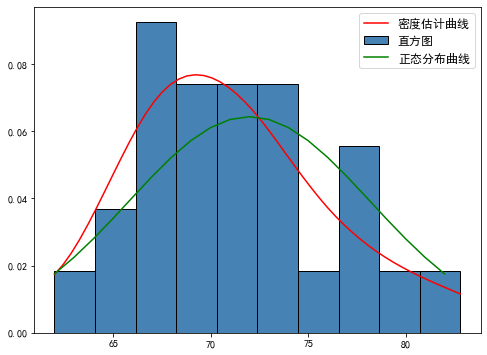

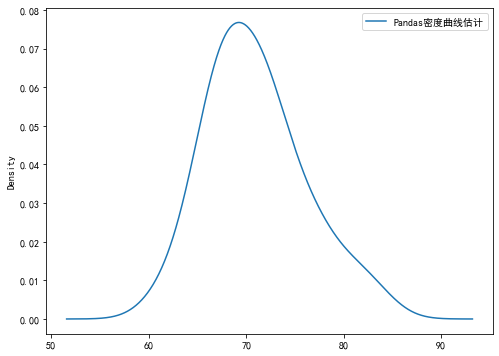

In [74]:
'''
数据的直方图、核密度估计曲线
'''
from scipy.interpolate import interp1d
import matplotlib.mlab as mlab  
#数据去重
weight_set = np.array(list(set(weights)))

#生成高斯核密度估计
kd = st.gaussian_kde(weight_set)
#dens = kd.evaluate(weight_set)
#通过高斯核密度估计计算概率密度
dens = kd.pdf(weight_set)
 # 插值法，50表示插值个数，个数>=实际数据个数，一般来说插值个数越多，曲线越平滑
x_new = np.linspace(min(weight_set),max(weight_set),50)  
#生成插值：'cubic'表示三次样条插值（Cubic Spline Interpolation）
f = interp1d(weight_set,dens, kind='cubic')
y_new = f(x_new)
#画出密度估计曲线
plt.figure(figsize=(8,6))
plt.plot(x_new,y_new,color='r',label="密度估计曲线")

#绘制直方图
plt.hist(weights,color='steelblue',density=True,label="直方图",edgecolor='k')

#根据体重数据的最大、最小值生成该范围内的正态分布密度函数值
x_norm = np.arange(np.min(weight_set),np.max(weight_set),1)
plt.plot(x_norm,st.norm.pdf(x_norm,np.mean(x_norm),st.tstd(x_norm)),
         color='g',label="正态分布曲线")

plt.legend(fontsize=12)
plt.show()

#使用Pandas计算密度估计曲线，效果也很好。
dx = pd.Series(weight_set)
plt.figure(figsize=(8,6))
dx.plot(kind='kde',label="Pandas密度曲线估计")
plt.legend()
plt.show()

### 1.4.2 经验分布函数


In [ ]:
'''
经验分布
'''
import statsmodels.distributions.empirical_distribution as em

#仍是用前面的体重数据
# x = np.array([75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7,
#               63.5,66.6, 64.0, 57.0, 69.0, 56.9, 50.0, 72.])
x = weights
#使用StatsModels的经验分布函数ECDF估计总体分布函数。
ecdf = em.ECDF(x)
x.sort()#对于x进行排序，由小到大
F = ecdf(x)
#使用matplotlib的step函数绘制经验分布函数曲线
plt.figure(figsize=(8,6))
plt.step(x, F, color='b',where='pre',label="经验分布（前点阶跃）")
plt.step(x, F, color='r',where='post',label="经验分布（后点阶跃）")
plt.xlim(60, 85)#设置x轴的范围
plt.ylim(0, 1.05)#设置y轴的范围
plt.vlines(x, 0, .05)#绘制垂直线


x_min = x.min()
x_max = x.max()
x_n = np.arange(x_min,x_max,0.01)
#根据x值获得y轴上的正态分布累积分布函数的值
y = st.norm.cdf(x_n,np.mean(x_n),np.std(x_n))
plt.plot(x_n,y,label="正态分布")
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

### 1.4.3 QQ图与茎叶图

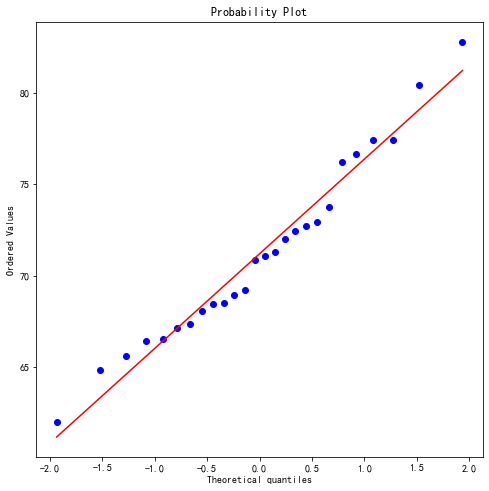

In [75]:
# weights = [75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7, 63.5,66.6, 
                               # 64.0, 57.0, 69.0, 56.9, 50.0, 72.]
#利用Scipy绘制QQ图
st.probplot(weights.astype(float),plot=plt)
plt.show()

- #### QQ图数据生成原理


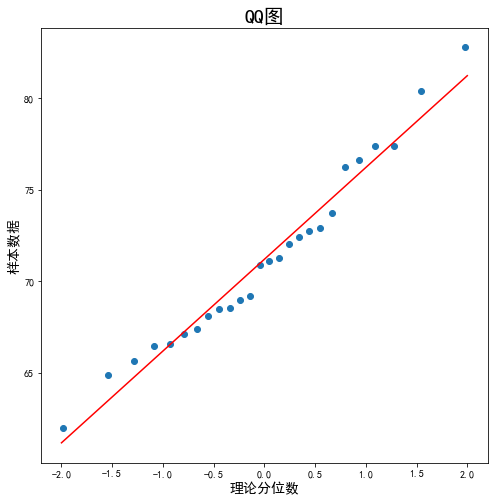

In [76]:
###手工计算QQ图

import scipy.special as ss
x = weights
n = len(x)#此处使用排序后的weights即前面的x
phi = np.zeros(n)
x = sorted(x)
#计算数据的标准正态分布反函数值，公式见下图
for i in range(1,n+1):
    #ndtri函数计算标准正态分布函数的反函数（注意是分布函数的反函数，不是密度函数的反函数）
    phi[i-1] = ss.ndtri((i-0.375)/(n+0.25))
#画出QQ散点图
plt.scatter(phi,x)

#绘制QQ图
q_std = st.tstd(x)#使用标准差的无偏估计
q_mean = np.mean(x)
qx = np.arange(-2,3)
qy = q_std*qx + q_mean#y = std*x + mu
plt.xlabel("理论分位数",size=14)
plt.ylabel("样本数据",size=14)
plt.title("QQ图",size=20)
plt.plot(qx,qy,color='r')
plt.show()

In [77]:
'''
茎叶图，用于直观展现数据分布的结构：竖线左边是十位数，右边是个位数
'''
from itertools import groupby
#某课程的考试分数
scores = np.array([25, 45, 50, 54, 55, 61, 64, 68, 72, 75, 75,
                   78, 79, 81, 83, 84, 84, 84, 85, 86, 86, 86,
                   87, 89, 89, 89, 90, 91, 91, 92, 100])
scores = weights
for k, g in groupby(sorted(scores),key=lambda x:x//10):
    l = map(str, [int(_) % 10 for _ in list(g)])
    print(k,'|',' '.join(l))
    

6.0 | 1 4 5 6 6 7 7 8 8 8 8 9
7.0 | 0 1 1 2 2 2 2 3 6 6 7 7
8.0 | 0 2


-------------------

## 1.5  多元数据的数据特征与相关性分析

### 1.5.1 二元数据的数字特征

- #### 示例：

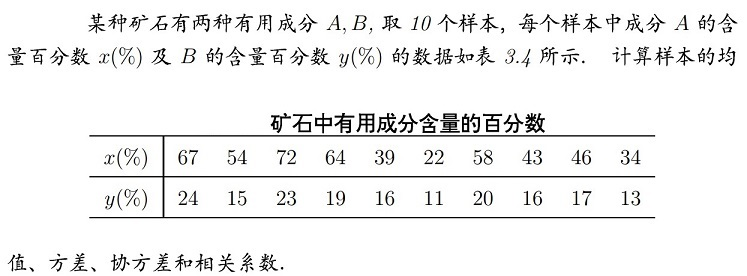

In [ ]:
#矿石数据分析
df = pd.read_excel(r'.\data.xlsx',sheet_name= 'Sheet2', header= 0)
# print(df)
fields = df.columns.values
print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
x = np.array(data[:,2:3]).astype(float)
y = np.array(data[:,3:4]).astype(float)
# print(x)

#将数据合并,合并成列向量。
data = np.c_[x,y]#此函数比较常用

print('矿石数据：\n',data)
#两种成分的均值，注意mean函数的axis参数指定计算哪个轴方向，此处为列向量。
print('\n矿石两种有用成分百分比：\n',pd.DataFrame(np.mean(data,axis=0),
                                      index=['x','y'],columns=['均值']))
#协方差矩阵与相关系数矩阵
print('\n两种成分的协方差矩阵：\n',pd.DataFrame(np.round(np.cov(data.T),2),
                                     index=['x','y'],columns=['x','y']))
print('\n两种成分的相关系数矩阵：\n',pd.DataFrame(np.round(np.corrcoef(data.T),2),
                                    index=['x','y'],columns=['x','y']))

In [ ]:
print('矿石有用成分之间有无关联性(pearsonr函数)：',st.pearsonr(data[:,0],data[:,1]))
#spearmanr函数无需假设数据服从正态分布，是一种典型的非参检验，原假设为数据不相关
print('\n矿石有用成分之间有无关联性(spearmanr):',st.spearmanr(data[:,0],data[:,1]))
#kendalltau也是一种非参检验；原假设为数据不相关
print('\n矿石有用成分之间有无关联性(kendalltau):',st.kendalltau(data[:,0],data[:,1]))

In [ ]:
#测试两种不同分布的数据是否相关。
a = st.t.rvs(size=10,df=3)
b = st.f.rvs(size=10,dfn=10,dfd=9)
st.kendalltau(a,b)#结果很显然不能拒绝不相关的原假设。p-value>0.05

### 1.5.2 多元数据的数字特征


- #### 示例：
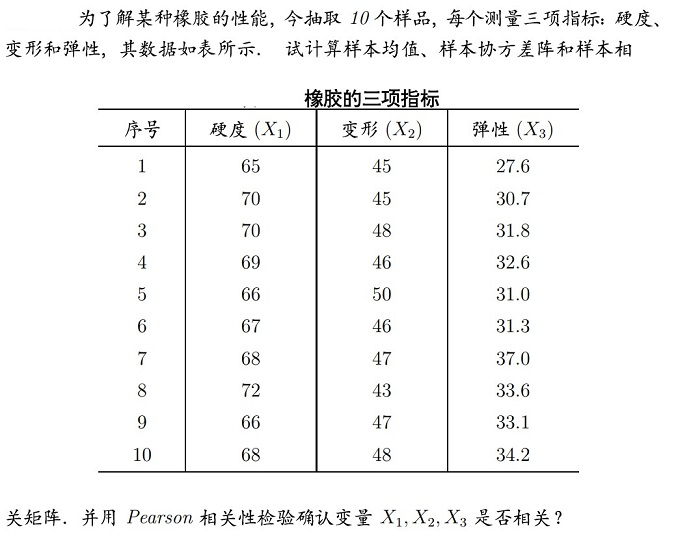

In [ ]:
'''
多元数据的数字特征。
'''
df = pd.read_excel(r'.\data.xlsx',sheet_name= 'Sheet2', header= 0)
# print(df)
fields = df.columns.values
print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
x1 = np.array(data[:,2:3]).astype(float)
x2 = np.array(data[:,3:4]).astype(float)
x3 = np.array(data[:,4:5]).astype(float)

data1=np.c_[x1,x2,x3]
print(data1)
###协方差矩阵
print('3项指标的协方差矩阵：\n',pd.DataFrame(np.round(np.cov(data1.T),2),
                                     index=['SiO2','CaO','MgO'],columns=['SiO2','CaO','MgO']))
###相关系数矩阵
print('\n3项指标的相关系数矩阵：\n',pd.DataFrame(np.round(np.corrcoef(data1.T),2),
                                     index=['SiO2','CaO','MgO'],columns=['SiO2','CaO','MgO']))


In [ ]:
print(st)

print('橡胶的硬度和变形之间有无关联性(pearsonr函数)：',st.pearsonr(data1[:,0],data1[:,1]))
print('\n橡胶的硬度和弹性之间有无关联性(pearsonr函数)：',st.pearsonr(data1[:,0],data1[:,2]))
print('\n橡胶的变形和弹性之间有无关联性(pearsonr函数)：',st.pearsonr(data1[:,1],data1[:,2]))

-------------------

## 1.6  多元数据的基本图形表示

- #### 示例：
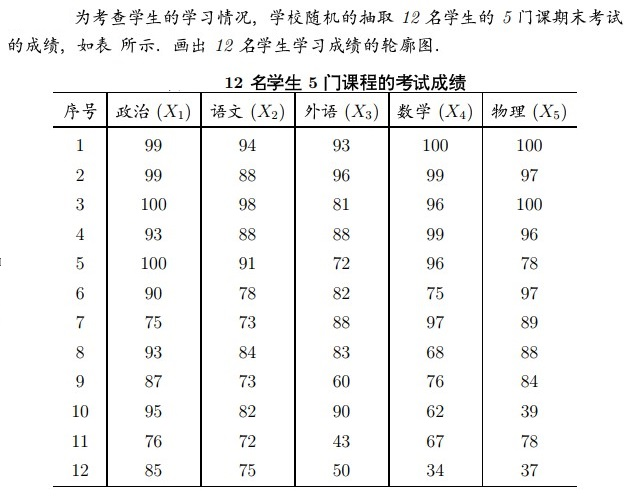

In [ ]:
#学生成绩，Xn代表某一门课所有抽样学生的成绩。
X1=[99, 99, 100, 93, 100, 90, 75, 93, 87, 95, 76, 85]#政治
X2=[94, 88,  98, 88,  91, 78, 73, 84, 73, 82, 72, 75]#语文
X3=[93, 96,  81, 88,  72, 82, 88, 83, 60, 90, 43, 50]#外语
X4=[100, 99,  96, 99,  96, 75, 97, 68, 76, 62, 67, 34]#数学
X5=[100, 97, 100, 96,  78, 97, 89, 88, 84, 39, 78, 37]#物理
scores = np.c_[X1,X2,X3,X4,X5]
#plt.polar(scores)

#课程的轮廓图
plt.figure()
plt.xlabel('学生',size=15)
plt.ylabel('成绩',size=15)
plt.title('课程成绩轮廓图',size=15)
#课程表
courses = np.array(['政治','语文','外语','数学','物理'])
#画出每门课的轮廓线
for i in np.arange(0,scores.shape[1]):
    plt.plot(np.arange(1,scores.shape[0]+1),scores[:,i],label=courses[i])  
    plt.legend()

plt.xticks(np.arange(1,scores.shape[0]+1),
           ['学生'+str(i+1) for i in np.arange(0,scores.shape[0])])
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)

#学生轮廓图
plt.figure()
plt.xlabel('课程',size=15)
plt.ylabel('成绩',size=15)
plt.title('学生成绩轮廓图',size=15)
#画出每个学生的轮廓线
for i in np.arange(0,scores.shape[0]):
    plt.plot(np.arange(1,scores.shape[1]+1),scores[i,:],label='学生'+str(i+1))   
    plt.legend(loc=3)
plt.yticks(size=12)
plt.xticks(np.arange(1,scores.shape[1]+1),courses,size=12 )

#课程成绩箱线图
plt.figure() 
plt.xlabel('课程',size=15)
plt.ylabel('成绩',size=15)
plt.title('课程成绩箱线图',size=15)
plt.boxplot(scores)#以列向量作为对象，即成绩为x轴

plt.xticks(np.arange(1,scores.shape[1]+1),courses,size=12)
plt.yticks(size=12)

#学生成绩箱线图
plt.figure() 
plt.xlabel('学生',size=15)
plt.ylabel('成绩',size=15)
plt.title('学生成绩箱线图',size=15)
plt.boxplot(scores.T)#转置之后即以学生为x轴
plt.xticks(np.arange(1,scores.shape[0]+1))
plt.xticks(np.arange(1,scores.shape[0]+1),
           ['学生'+str(i+1) for i in np.arange(0,scores.shape[0])])
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.show()

-----------------------